In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

### Read Dataset

In [2]:
dataframe = pd.read_csv('car.data')
dataframe.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Check for Missing Data

<AxesSubplot:>

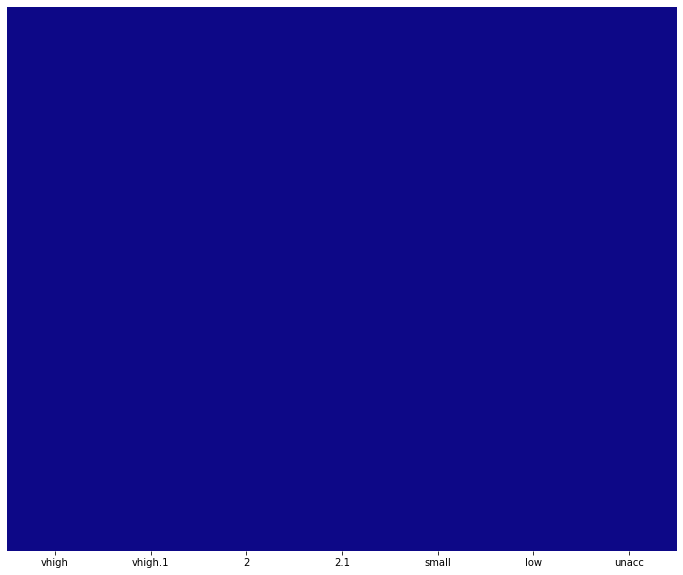

In [3]:
# Checking for missing data
plt.figure(figsize = (12, 10))
sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='plasma')
# No missing data

### Handle Categorical Values

In [4]:
# adding column names and reordering them 
dataframe.columns = ['Buying Price', 'Maint. Price', 'No. of Doors', 'No. of Persons', 'Luggage Boot', 'Safety', 'Class']
dataframe = dataframe.reindex(columns=['Buying Price', 'Maint. Price', 'Luggage Boot', 'Safety', 'Class', 'No. of Doors', 'No. of Persons'])
dataframe['Class'].unique().astype(str)

array(['unacc', 'acc', 'vgood', 'good'], dtype='<U5')

In [5]:
# substituting the values of vhigh, high, med, low with subsequent numerical values
dataframe[['Buying Price']] = dataframe[['Buying Price']].replace(['vhigh','high','med', 'low'], [4, 3, 2, 1])
dataframe[['Maint. Price']] = dataframe[['Maint. Price']].replace(['vhigh','high','med', 'low'], [4, 3, 2, 1])
dataframe[['Luggage Boot']] = dataframe[['Luggage Boot']].replace(['big','med', 'small'], [3, 2, 1])
dataframe[['Safety']] = dataframe[['Safety']].replace(['high','med', 'low'], [3, 2, 1])
dataframe[['Class']] = dataframe[['Class']].replace(['vgood', 'good', 'acc', 'unacc'], [4, 3, 2, 1])
dataframe[['No. of Doors']] = dataframe[['No. of Doors']].replace(['5more'], [5])
dataframe[['No. of Persons']] = dataframe[['No. of Persons']].replace(['more'], [5])

### Getting corelations

<AxesSubplot:>

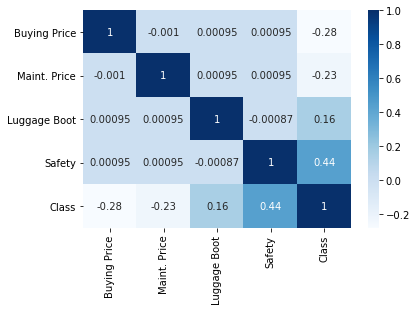

In [6]:
sns.heatmap(dataframe.corr(), annot=True, cmap='Blues')

### Split Data for Training and Testing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = dataframe.drop(['Class'], axis=1)
Y = dataframe['Class']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Apply different Classification Algorithms and tune them

Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_model = DecisionTreeClassifier(max_depth=10, random_state=0, criterion='entropy')
tree_model.fit(X_train, Y_train)
# OBSERVATION : Increasing the max_depth of the decision tree increases classifier performance

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [12]:
dectree_predictions = tree_model.predict(X_test)

In [13]:
# comparing the predictions and actual values
compare_dectree = pd.DataFrame({'Actual':Y_test, 'Predicted':dectree_predictions})
compare_dectree.head(50)

,Actual,Predicted
157,1,1
460,1,1
669,1,2
1331,1,1
1337,1,1
373,2,2
552,1,2
1154,1,1
1258,4,4
1163,1,1


Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression(max_iter=800)
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=800)

In [16]:
log_predictions = log_model.predict(X_test)

In [17]:
# comparing the predictions and actual values
compare_log = pd.DataFrame({'Actual':Y_test, 'Predicted':log_predictions})
compare_log.head(50)

,Actual,Predicted
157,1,2
460,1,1
669,1,1
1331,1,1
1337,1,1
373,2,2
552,1,1
1154,1,1
1258,4,4
1163,1,1


Support Vector Machine

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [20]:
svm_predictions = svm_model.predict(X_test)

In [21]:
# comparing the predictions and actual values
compare_log = pd.DataFrame({'Actual':Y_test, 'Predicted':svm_predictions})
compare_log.head(50)

,Actual,Predicted
157,1,1
460,1,1
669,1,2
1331,1,1
1337,1,1
373,2,2
552,1,1
1154,1,1
1258,4,4
1163,1,1


### Get performance metrics for all the applied classifiers

In [22]:
from sklearn.metrics import classification_report

For Decision Tree

In [23]:
print(classification_report(Y_test, dectree_predictions))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       373
           2       0.94      0.94      0.94       109
           3       0.81      1.00      0.89        17
           4       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.93      0.97      0.95       519
weighted avg       0.97      0.97      0.97       519



For Logistic Regression

In [24]:
print(classification_report(Y_test, log_predictions))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       373
           2       0.69      0.69      0.69       109
           3       0.45      0.29      0.36        17
           4       0.93      0.70      0.80        20

    accuracy                           0.86       519
   macro avg       0.75      0.66      0.70       519
weighted avg       0.86      0.86      0.86       519



For SVM

In [25]:
print(classification_report(Y_test, svm_predictions))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       373
           2       0.83      0.94      0.88       109
           3       0.80      0.71      0.75        17
           4       1.00      0.70      0.82        20

    accuracy                           0.95       519
   macro avg       0.91      0.83      0.86       519
weighted avg       0.95      0.95      0.95       519



### Visually compare the performance of all classifiers

In [26]:
names = [
    "Decision Tree",
    "Logistic Regression",
    "Support Vector Machine"
]

scores = [
    tree_model.score(X_test, Y_test),
    log_model.score(X_test, Y_test),  
    svm_model.score(X_test, Y_test) 
]   # obtaining accuracy scores of each classifier

In [27]:
# making a dataframe with names and scores
perf_df = pd.DataFrame()
perf_df['name'] = names
perf_df['score'] = scores
perf_df

,name,score
0,Decision Tree,0.973025
1,Logistic Regression,0.863198
2,Support Vector Machine,0.947977


In [28]:
# color coding the dataframe
color_coded = sns.light_palette("blue", as_cmap=True)
perf_df_color = perf_df.style.background_gradient(cmap=color_coded)
perf_df_color
# lighter the color, lesser the score

,name,score
0,Decision Tree,0.973025
1,Logistic Regression,0.863198
2,Support Vector Machine,0.947977


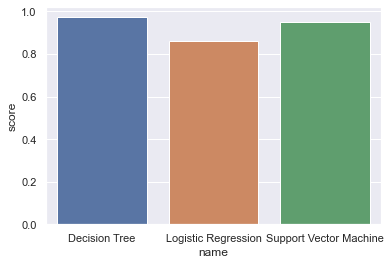

In [29]:
# creating a bar graph to assess performance
sns.set(style="darkgrid")
ax = sns.barplot(y="score", x="name", data=perf_df)